   Size    Method  ExecutionTime(ms)
0    10  parallel            0.11998
1    10    serial            0.04028
2    20  parallel            0.30880
3    20    serial            0.62870
4    30  parallel            0.91470
5    30    serial            3.08294


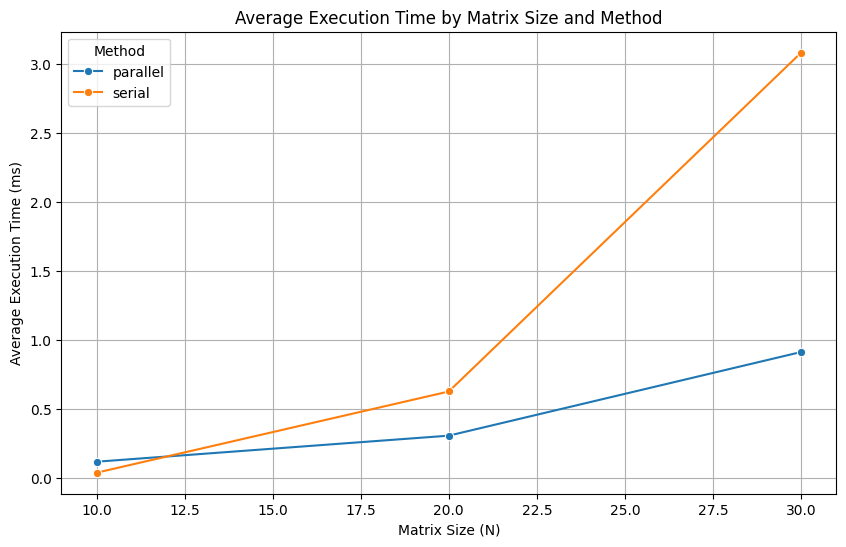

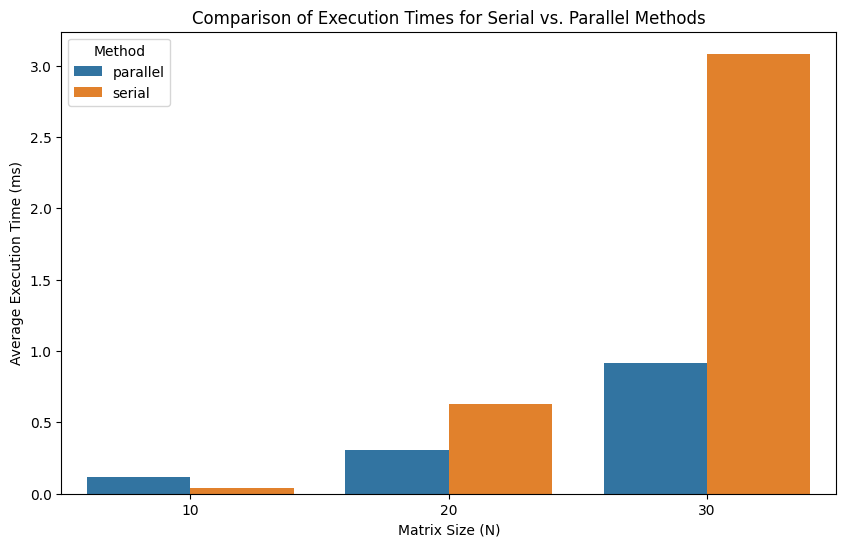

   Size    Method     mean       std
0    10  parallel  0.11998  0.057783
1    10    serial  0.04028  0.017565
2    20  parallel  0.30880  0.129097
3    20    serial  0.62870  0.276813
4    30  parallel  0.91470  0.217534
5    30    serial  3.08294  0.935149


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the CSV data has been uploaded to the environment as "execution_times.csv"
# Let's read the CSV file into a DataFrame
df = pd.read_csv('execution_times.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()
average_times = df.groupby(['Size', 'Method'])['ExecutionTime(ms)'].mean().reset_index()
print(average_times)
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_times, x='Size', y='ExecutionTime(ms)', hue='Method', marker='o')
plt.title('Average Execution Time by Matrix Size and Method')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Average Execution Time (ms)')
plt.grid(True)
plt.legend(title='Method')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_times, x='Size', y='ExecutionTime(ms)', hue='Method')
plt.title('Comparison of Execution Times for Serial vs. Parallel Methods')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Average Execution Time (ms)')
plt.legend(title='Method')
plt.show()
execution_stats = df.groupby(['Size', 'Method'])['ExecutionTime(ms)'].agg(['mean', 'std']).reset_index()
print(execution_stats)



   Size   Speedup
0    10  0.335723
1    20  2.035946
2    30  3.370438


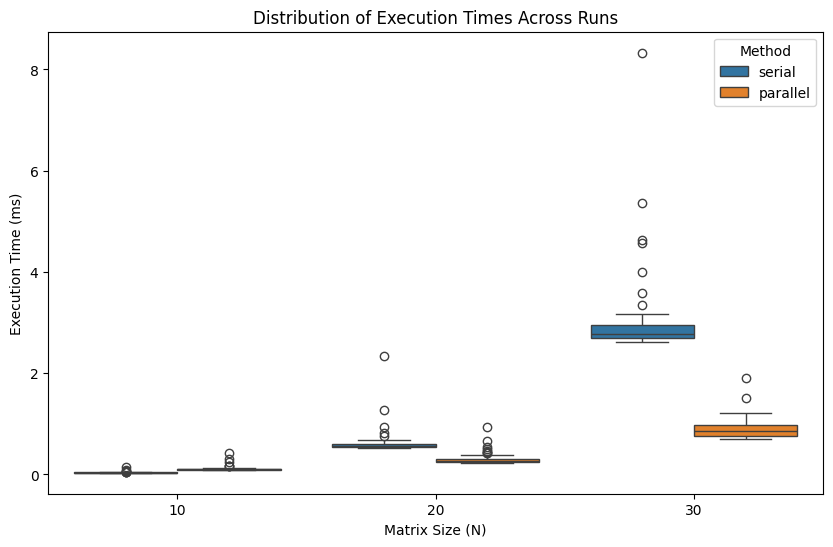

In [14]:
speedup = df[df['Method'] == 'serial'].groupby('Size')['ExecutionTime(ms)'].mean() / df[df['Method'] == 'parallel'].groupby('Size')['ExecutionTime(ms)'].mean()
speedup = speedup.reset_index(name='Speedup')
print(speedup)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Size', y='ExecutionTime(ms)', hue='Method')
plt.title('Distribution of Execution Times Across Runs')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Execution Time (ms)')
plt.legend(title='Method')
plt.show()
